# Load the previously crawled data and compute a sentiment per tweet based on the pretrained model Vader. Then aggregate the sentiment of the daily tweets to obtain a sentiment index. 

In [ ]:
import pandas as pd
import numpy as np
import re
from pandas.core.frame import DataFrame
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#create a csv reader
reader = pd.read_csv("Bitcoin_tweets_2.csv",chunksize=100,low_memory=False)
#create a dataframe and check the function of chunksize later
chunk1_data = pd.concat(reader, ignore_index=True)

In [40]:
print(chunk1_data.shape)
chunk1_data

(1945310, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945305,Ali,NaN,@TsukiverseToken will be releasing game on And...,2021-04-15 17:25:34,12.0,51,1227,False,2021-11-25 19:12:31,@Tsuga007 @AltCryptoGems Something Big is on t...,"['Tsuga', 'PlaytoEarn', 'game', '𝙏𝙎𝙐𝙂𝘼', 'BNB'...",Twitter for Android,False
1945306,hossin kh,NaN,NaN,2018-11-08 22:59:01,5.0,15,655,False,2021-11-25 19:12:28,@Tsuga007 @AltCryptoGems Something Big is on t...,"['Tsuga', 'PlaytoEarn', 'game', '𝙏𝙎𝙐𝙂𝘼', 'BNB'...",Twitter Web App,False
1945307,TRENDsMarket,NaN,Information and Comments Found Here Are Not In...,2021-08-18 23:10:11,64.0,0,0,False,2021-11-25 19:12:27,MATIC__ CRYPTO PRİCE WİLL RİSE_|__ #USD...,"['USDEGP', 'CNHTRY', 'USDHUF', 'GBPCHF', 'SAR'...",Twitter Web App,False
1945308,Ali,NaN,@TsukiverseToken will be releasing game on And...,2021-04-15 17:25:34,12.0,51,1227,False,2021-11-25 19:12:24,@Tsuga007 @AltCryptoGems Something Big is on t...,"['Tsuga', 'PlaytoEarn', 'game', '𝙏𝙎𝙐𝙂𝘼', 'BNB'...",Twitter for Android,False


In [41]:
#chunksize not working
#clean the dataframe, drop the row where the "text" column is NaN
df=chunk1_data.dropna(subset=['text']).reset_index(drop=True)
print(df.shape)
df.tail(20)

(1944261, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
1944241,reza,NaN,i love you,2020-09-25 10:46:30,37.0,169.0,2219.0,False,2021-11-25 19:13:40,@Tsuga007 @AltCryptoGems Something Big is on t...,"['Tsuga', 'PlaytoEarn', 'game', '𝙏𝙎𝙐𝙂𝘼', 'BNB'...",Twitter for Android,False
1944242,topstonks,NaN,Wanna know where #stonks are in the hype cycle...,2020-01-08 17:10:46,2965.0,1184.0,149.0,False,2021-11-25 19:13:40,$BTC seeing an uptick in chatter on 4chan over...,NaN,NaN,NaN
1944243,Sobremesa,NaN,Sobremesa,2021-06-01 19:45:39,14.0,51.0,15.0,False,2021-11-25 19:13:38,Check out this item on OpenSea https://t.co/cw...,"['NFT', 'nfts', 'NFTGiveaway', 'nftcollector',...",Twitter Web App,False
1944244,Crypto Vegan,NaN,@AURofficial_\nhttps://t.co/kLwbQPX7s0\nLifeti...,2012-11-04 16:24:02,178.0,1104.0,12923.0,False,2021-11-25 19:13:37,@ihassansheikh @ctenfts The #Aurum Official #s...,"['Aurum', 'socialmedia', 'BlackFriday', 'Disco...",Twitter Web App,False
1944245,slomax,slough,crypto fanatic love $koda,2011-09-24 17:33:43,3158.0,230.0,679.0,False,2021-11-25 19:13:25,Yesterday we were #1 new coin on @CoinMarketCa...,"['cryptocurrency', 'BNB', 'CoinMarketCap', 'bt...",Twitter for iPhone,False
1944246,Crypto Vegan,NaN,@AURofficial_\nhttps://t.co/kLwbQPX7s0\nLifeti...,2012-11-04 16:24:02,178.0,1104.0,12923.0,False,2021-11-25 19:13:20,@ihassansheikh @ShibaHsu The #Aurum Official #...,"['Aurum', 'socialmedia', 'BlackFriday', 'Disco...",Twitter Web App,False
1944247,Tech_Team,Canada,Software teams with highly talented members/#C...,2017-09-30 02:34:44,1810.0,179.0,20253.0,False,2021-11-25 19:13:14,@ViciousTrading how about #btc 😛,['btc'],Twitter for Android,False
1944248,hossin kh,NaN,NaN,2018-11-08 22:59:01,5.0,15.0,655.0,False,2021-11-25 19:13:10,@Tsuga007 @AltCryptoGems Something Big is on t...,"['Tsuga', 'PlaytoEarn', 'game', '𝙏𝙎𝙐𝙂𝘼', 'BNB'...",Twitter Web App,False
1944249,Degendona,NaN,NaN,2012-05-29 09:53:40,214.0,617.0,4578.0,False,2021-11-25 19:13:06,@AntoAttorre @Samuratoken\n GEM FOR 2021\n\n70...,"['BTC', 'BSC', 'Gem', 'x1000', 'Samura', 'Samu...",Twitter Web App,False
1944250,LMSC,NaN,Innovation that will turbo charge World's econ...,2021-10-28 20:14:22,1.0,3.0,4.0,False,2021-11-25 19:12:46,@Investments_CEO #MANA to #Mars via #Moon🛸🛸\n#...,"['MANA', 'Mars', 'Moon', 'Decentraland', 'btc'...",Twitter for Android,False


In [42]:
#We discovered tweet in row no.1489542 is from CryptoBot, try to drop all the tweets that are from crytobot 
df["source"]= df["source"].apply(str)
df["source"]= df["source"].str.lower()
df_cleaned = df[~df["source"].str.contains("bot")]
print(df_cleaned.shape)
df_cleaned.tail(20)

(1863152, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
1944241,reza,NaN,i love you,2020-09-25 10:46:30,37.0,169.0,2219.0,False,2021-11-25 19:13:40,@Tsuga007 @AltCryptoGems Something Big is on t...,"['Tsuga', 'PlaytoEarn', 'game', '𝙏𝙎𝙐𝙂𝘼', 'BNB'...",twitter for android,False
1944242,topstonks,NaN,Wanna know where #stonks are in the hype cycle...,2020-01-08 17:10:46,2965.0,1184.0,149.0,False,2021-11-25 19:13:40,$BTC seeing an uptick in chatter on 4chan over...,NaN,nan,NaN
1944243,Sobremesa,NaN,Sobremesa,2021-06-01 19:45:39,14.0,51.0,15.0,False,2021-11-25 19:13:38,Check out this item on OpenSea https://t.co/cw...,"['NFT', 'nfts', 'NFTGiveaway', 'nftcollector',...",twitter web app,False
1944244,Crypto Vegan,NaN,@AURofficial_\nhttps://t.co/kLwbQPX7s0\nLifeti...,2012-11-04 16:24:02,178.0,1104.0,12923.0,False,2021-11-25 19:13:37,@ihassansheikh @ctenfts The #Aurum Official #s...,"['Aurum', 'socialmedia', 'BlackFriday', 'Disco...",twitter web app,False
1944245,slomax,slough,crypto fanatic love $koda,2011-09-24 17:33:43,3158.0,230.0,679.0,False,2021-11-25 19:13:25,Yesterday we were #1 new coin on @CoinMarketCa...,"['cryptocurrency', 'BNB', 'CoinMarketCap', 'bt...",twitter for iphone,False
1944246,Crypto Vegan,NaN,@AURofficial_\nhttps://t.co/kLwbQPX7s0\nLifeti...,2012-11-04 16:24:02,178.0,1104.0,12923.0,False,2021-11-25 19:13:20,@ihassansheikh @ShibaHsu The #Aurum Official #...,"['Aurum', 'socialmedia', 'BlackFriday', 'Disco...",twitter web app,False
1944247,Tech_Team,Canada,Software teams with highly talented members/#C...,2017-09-30 02:34:44,1810.0,179.0,20253.0,False,2021-11-25 19:13:14,@ViciousTrading how about #btc 😛,['btc'],twitter for android,False
1944248,hossin kh,NaN,NaN,2018-11-08 22:59:01,5.0,15.0,655.0,False,2021-11-25 19:13:10,@Tsuga007 @AltCryptoGems Something Big is on t...,"['Tsuga', 'PlaytoEarn', 'game', '𝙏𝙎𝙐𝙂𝘼', 'BNB'...",twitter web app,False
1944249,Degendona,NaN,NaN,2012-05-29 09:53:40,214.0,617.0,4578.0,False,2021-11-25 19:13:06,@AntoAttorre @Samuratoken\n GEM FOR 2021\n\n70...,"['BTC', 'BSC', 'Gem', 'x1000', 'Samura', 'Samu...",twitter web app,False
1944250,LMSC,NaN,Innovation that will turbo charge World's econ...,2021-10-28 20:14:22,1.0,3.0,4.0,False,2021-11-25 19:12:46,@Investments_CEO #MANA to #Mars via #Moon🛸🛸\n#...,"['MANA', 'Mars', 'Moon', 'Decentraland', 'btc'...",twitter for android,False


In [43]:
#drop columns=['user_name', 'user_created','user_verified','hashtags','source',is_retweet'] 
btc=df_cleaned.loc[:,["date","text","user_location","user_description","user_followers","user_friends"]]
btc

,date,text,user_location,user_description,user_followers,user_friends
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",8534.0,7605
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,6769.0,1532
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...","London, England","IM Academy : The best #forex, #SelfEducation, ...",128.0,332
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,NaN,I will post a lot of buying signals for BTC tr...,625.0,129
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,1249.0,1472
...,...,...,...,...,...,...
1944256,2021-11-25 19:12:31,@Tsuga007 @AltCryptoGems Something Big is on t...,NaN,@TsukiverseToken will be releasing game on And...,12.0,51
1944257,2021-11-25 19:12:28,@Tsuga007 @AltCryptoGems Something Big is on t...,NaN,NaN,5.0,15
1944258,2021-11-25 19:12:27,MATIC__ CRYPTO PRİCE WİLL RİSE_|__ #USD...,NaN,Information and Comments Found Here Are Not In...,64.0,0
1944259,2021-11-25 19:12:24,@Tsuga007 @AltCryptoGems Something Big is on t...,NaN,@TsukiverseToken will be releasing game on And...,12.0,51


In [44]:
btc[(btc['date'] > '2021-05-01') & (btc['date'] < '2021-05-06')]

,date,text,user_location,user_description,user_followers,user_friends


In [45]:
btc["text"] = btc["text"].apply(str)
tweets = btc["text"].tolist()
tweets[0:11]

['Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement https://t.co/xaaZmaJKiV @MyBlueRidgeBank… https://t.co/sgBxMkP1SI',
 '😎 Today, that\'s this #Thursday, we will do a "🎬 Take 2" with our friend @LeoWandersleb, #Btc #wallet #security expe… https://t.co/go6aDgRml5',
 'Guys evening, I have read this article about BTC and would like to share with you all - https://t.co/QxCZgmuy3B… https://t.co/o6wn7ppkVY',
 '$BTC A big chance in a billion! Price: \\4872644.0 (2021/02/11 08:51) #Bitcoin #FX #BTC #crypto',
 'This network is secured by 9 508 nodes as of today. Soon, the biggest bears will recognise: #BTC in too big to fail… https://t.co/1XovDA8rKw',
 '💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashback 10% of the Trading fee\n📌 Sign up link 👉 https://t.co/T4WttWeohc… https://t.co/Fc7dG5oI8W',
 '🔄 Prices update in $EUR (1 hour):\n\n$BTC   - 37082.1 €  (-0.51 %)\n$ETH   - 1441.59 €  (+0.21 %)\n$XRP   - 0.42 €    (… https://t.co/y3wlhAv2SX',
 '#BTC #Bitcoin #Ethereum #ETH #Cry

In [46]:
def processTweet(tweet): #start process_tweet
    # process the tweets
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)#trim
    tweet = tweet.strip('\'"')
    return tweet
#end
tweets_cleaned = []
#Read the tweets one by one and process it
for i in range (0,len(tweets)):
    processedTweet = processTweet(tweets[i])
    tweets_cleaned.append(processedTweet)
print(len(tweets_cleaned))
tweets_cleaned[0:11]

1863152


['blue ridge bank shares halted by nyse after bitcoin atm announcement URL AT_USER URL',
 '😎 today, that\'s this thursday, we will do a "🎬 take 2" with our friend AT_USER btc wallet security expe… URL',
 'guys evening, i have read this article about btc and would like to share with you all - URL URL',
 '$btc a big chance in a billion! price: \\4872644.0 (2021/02/11 08:51) bitcoin fx btc crypto',
 'this network is secured by 9 508 nodes as of today. soon, the biggest bears will recognise: btc in too big to fail… URL',
 '💹 trade crypto on binance 📌 enjoy cashback 10% of the trading fee 📌 sign up link 👉 URL URL',
 '🔄 prices update in $eur (1 hour): $btc - 37082.1 € (-0.51 %) $eth - 1441.59 € (+0.21 %) $xrp - 0.42 € (… URL',
 'btc bitcoin ethereum eth crypto cryptotrading $rsr i know i told you guys the target was $0.060, i know we… URL',
 '.AT_USER bitcoin investment is revolutionary for crypto but other firms may not do the same just yet - AT_USER URL',
 'annnd btc bitcoin is headed even

In [47]:
vader = SentimentIntensityAnalyzer()
def getCoumpoundScore(Tweets):
    score = vader.polarity_scores(Tweets)['compound']
    return score
scores = []
#Read the tweets one by one and get the sentiment score
for i in range (0,len(tweets_cleaned)):
    tweets_score = getCoumpoundScore(tweets_cleaned[i])
    scores.append(tweets_score)   
#store the tweet with polarity score in a dictionary
df = {"tweets": tweets_cleaned, "score" : scores}
data = DataFrame(df)#transfer into a dataframe
print(data.shape)
data.head(11)

(1863152, 2)


,tweets,score
0,blue ridge bank shares halted by nyse after bi...,0.2960
1,"😎 today, that's this thursday, we will do a ""🎬...",0.8225
2,"guys evening, i have read this article about b...",0.5719
3,$btc a big chance in a billion! price: \487264...,0.3164
4,this network is secured by 9 508 nodes as of t...,0.4019
5,💹 trade crypto on binance 📌 enjoy cashback 10%...,0.4939
6,🔄 prices update in $eur (1 hour): $btc - 37082...,-0.2023
7,btc bitcoin ethereum eth crypto cryptotrading ...,0.0000
8,.AT_USER bitcoin investment is revolutionary f...,0.0000
9,annnd btc bitcoin is headed even higher now......,0.0000


In [48]:
merged_data = pd.concat([btc, data], axis=1).reset_index(drop=True)
merged_data = merged_data.drop('text', axis=1)
print(merged_data.shape)
merged_data.head(10)

(1941546, 7)


,date,user_location,user_description,user_followers,user_friends,tweets,score
0,2021-02-10 23:59:04,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",8534.0,7605,blue ridge bank shares halted by nyse after bi...,0.2960
1,2021-02-10 23:58:48,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,6769.0,1532,"😎 today, that's this thursday, we will do a ""🎬...",0.8225
2,2021-02-10 23:54:48,"London, England","IM Academy : The best #forex, #SelfEducation, ...",128.0,332,"guys evening, i have read this article about b...",0.5719
3,2021-02-10 23:54:33,NaN,I will post a lot of buying signals for BTC tr...,625.0,129,$btc a big chance in a billion! price: \487264...,0.3164
4,2021-02-10 23:54:06,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,1249.0,1472,this network is secured by 9 508 nodes as of t...,0.4019
5,2021-02-10 23:53:30,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,742.0,716,💹 trade crypto on binance 📌 enjoy cashback 10%...,0.4939
6,NaN,NaN,NaN,NaN,NaN,🔄 prices update in $eur (1 hour): $btc - 37082...,-0.2023
7,2021-02-10 23:52:42,NaN,Stay updated on the main cryptocurrencies of t...,4052.0,1,btc bitcoin ethereum eth crypto cryptotrading ...,0.0000
8,2021-02-10 23:52:25,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",104.0,41,.AT_USER bitcoin investment is revolutionary f...,0.0000
9,2021-02-10 23:52:08,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",8534.0,7605,annnd btc bitcoin is headed even higher now......,0.0000


In [49]:
#transfer date's string type into date time in order to do time dynamic analysis
#Error message:'Unknown string format:', "['ETH', 'BTC', 'Bitcoin']", also NaN is contained in date
#So clean the date column
da = merged_data.dropna(subset=['date']).reset_index(drop=True)
da = da[~da["date"].str.contains("ETH" or "BTC" or "Bitcoin")] #only two are detected and erased
print(da.shape)

(1863150, 7)


In [50]:
da['date'] = pd.to_datetime(da['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
print(type(da['date'][1]))
#delete value as "NaT" in date
da = da.dropna(subset=['date']).reset_index(drop=True)
print(da.shape)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
(1863137, 7)


In [51]:
da = da.sort_values(by="date")
da.head(10)

,date,user_location,user_description,user_followers,user_friends,tweets,score
20792,2021-02-05 10:52:04,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,301.0,1075,AT_USER AT_USER AT_USER right here w/ AT_USER ...,0.0000
20793,2021-02-05 10:52:04,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,301.0,1075,AT_USER AT_USER please donate bitcoin19 donate...,0.6597
20791,2021-02-05 10:52:06,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,301.0,1075,$sos market cap is 308 million. if they’re min...,0.0000
20790,2021-02-05 10:52:07,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,301.0,1075,"bitcoin btc current price (gbp): £34,880 like ...",0.3612
20789,2021-02-05 10:52:26,"Edam-Volendam, Nederland","Amateur historicus m.n. WW2, schrijver, muziek...",37.0,123,AT_USER right here w/ AT_USER URL referral cod...,0.0000
20788,2021-02-05 10:53:49,NaN,#Bitcoin #BTC,100.0,388,klv just broke out of a bullflag. here is an i...,-0.5267
20787,2021-02-05 10:54:52,"Los Angeles, CA",A Lion Story (Private group closed)\n#CryptoMo...,69.0,52,AT_USER right here w/ AT_USER URL referral cod...,0.0000
20786,2021-02-05 10:57:05,Dubai - United Arab Emirates,loved Crypto since 2017\nفقط أضيف الحسابات الم...,163.0,288,AT_USER keep goin and have luck! btc bitcoin,0.5093
20785,2021-02-05 10:58:03,Australia,"love interesting startups, stocks and innovati...",2520.0,1085,AT_USER AT_USER right here w/ AT_USER URL refe...,0.0000
20784,2021-02-05 10:58:36,Jungle,"👉 https://t.co/U0GNQ7fs9m Amazon DeFi, Nature ...",1036.0,0,btc ethereum bitcoin eth binance cyrpto reef d...,0.0000


In [52]:
da=da.reset_index(drop=True)
da.head(10)

,date,user_location,user_description,user_followers,user_friends,tweets,score
0,2021-02-05 10:52:04,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,301.0,1075,AT_USER AT_USER AT_USER right here w/ AT_USER ...,0.0000
1,2021-02-05 10:52:04,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,301.0,1075,AT_USER AT_USER please donate bitcoin19 donate...,0.6597
2,2021-02-05 10:52:06,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,301.0,1075,$sos market cap is 308 million. if they’re min...,0.0000
3,2021-02-05 10:52:07,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,301.0,1075,"bitcoin btc current price (gbp): £34,880 like ...",0.3612
4,2021-02-05 10:52:26,"Edam-Volendam, Nederland","Amateur historicus m.n. WW2, schrijver, muziek...",37.0,123,AT_USER right here w/ AT_USER URL referral cod...,0.0000
5,2021-02-05 10:53:49,NaN,#Bitcoin #BTC,100.0,388,klv just broke out of a bullflag. here is an i...,-0.5267
6,2021-02-05 10:54:52,"Los Angeles, CA",A Lion Story (Private group closed)\n#CryptoMo...,69.0,52,AT_USER right here w/ AT_USER URL referral cod...,0.0000
7,2021-02-05 10:57:05,Dubai - United Arab Emirates,loved Crypto since 2017\nفقط أضيف الحسابات الم...,163.0,288,AT_USER keep goin and have luck! btc bitcoin,0.5093
8,2021-02-05 10:58:03,Australia,"love interesting startups, stocks and innovati...",2520.0,1085,AT_USER AT_USER right here w/ AT_USER URL refe...,0.0000
9,2021-02-05 10:58:36,Jungle,"👉 https://t.co/U0GNQ7fs9m Amazon DeFi, Nature ...",1036.0,0,btc ethereum bitcoin eth binance cyrpto reef d...,0.0000


In [53]:
da.to_csv('btc_score_v1.csv',index=False)

In [54]:
d_raw = da.loc[:,["date","score"]]
d_hourly=d_raw.groupby(pd.Grouper(key='date',freq='H')).agg([np.mean, np.std, np.var])
d_hourly

score                    
                         mean       std       var
date                                             
2021-02-05 10:00:00  0.091227  0.317950  0.101092
2021-02-05 11:00:00  0.167448  0.368591  0.135859
2021-02-05 12:00:00  0.157152  0.374703  0.140403
2021-02-05 13:00:00  0.177828  0.386389  0.149296
2021-02-05 14:00:00  0.133480  0.395140  0.156135
...                       ...       ...       ...
2021-11-26 19:00:00  0.252113  0.425334  0.180909
2021-11-26 20:00:00  0.218467  0.470058  0.220955
2021-11-26 21:00:00  0.229934  0.450842  0.203258
2021-11-26 22:00:00  0.229789  0.421192  0.177402
2021-11-26 23:00:00  0.210741  0.498201  0.248204

[7070 rows x 3 columns]

In [55]:
d_hourly.to_csv('btc_score_hourly_raw.csv',index=True)

In [56]:
d_daily = d_raw.groupby(pd.Grouper(key='date',freq='D')).agg([np.mean, np.std, np.var])
d_daily.head(20)

score                    
                mean       std       var
date                                    
2021-02-05  0.151515  0.375420  0.140940
2021-02-06  0.148199  0.356104  0.126810
2021-02-07  0.145060  0.340988  0.116273
2021-02-08  0.166337  0.355058  0.126066
2021-02-09  0.155760  0.362583  0.131466
2021-02-10  0.181649  0.364100  0.132569
2021-02-11       NaN       NaN       NaN
2021-02-12       NaN       NaN       NaN
2021-02-13  0.147921  0.364068  0.132545
2021-02-14  0.247778  0.394838  0.155897
2021-02-15  0.365897  0.416667  0.173612
2021-02-16       NaN       NaN       NaN
2021-02-17       NaN       NaN       NaN
2021-02-18  0.148784  0.362651  0.131515
2021-02-19  0.153861  0.360949  0.130284
2021-02-20       NaN       NaN       NaN
2021-02-21       NaN       NaN       NaN
2021-02-22  0.132034  0.372294  0.138603
2021-02-23       NaN       NaN       NaN
2021-02-24       NaN       NaN       NaN

In [57]:
d_daily.to_csv('btc_score_daily_raw.csv',index=True)

In [6]:
# load data if necessary
import pandas as pd
d_daily = pd.read_csv('data/btc_score_daily_raw.csv')

In [7]:
len(d_daily)
d_daily.tail()

,date,mean,std,var
290,2021-11-22,NaN,NaN,NaN
291,2021-11-23,NaN,NaN,NaN
292,2021-11-24,NaN,NaN,NaN
293,2021-11-25,NaN,NaN,NaN
294,2021-11-26,0.231743,0.433646,0.188049


In [8]:
df1= d_daily.interpolate()

In [9]:
df1.head(10)

,date,mean,std,var
0,2021-02-05,0.151515,0.375420,0.140940
1,2021-02-06,0.148199,0.356104,0.126810
2,2021-02-07,0.145060,0.340988,0.116273
3,2021-02-08,0.166337,0.355058,0.126066
4,2021-02-09,0.155760,0.362583,0.131466
5,2021-02-10,0.181649,0.364100,0.132569
6,2021-02-11,0.170406,0.364089,0.132561
7,2021-02-12,0.159163,0.364079,0.132553
8,2021-02-13,0.147921,0.364068,0.132545
9,2021-02-14,0.247778,0.394838,0.155897


In [10]:
clean_df = d_daily.dropna()
#clean_df = clean_df.set_index("date")
clean_df

,date,mean,std,var
0,2021-02-05,0.151515,0.375420,0.140940
1,2021-02-06,0.148199,0.356104,0.126810
2,2021-02-07,0.145060,0.340988,0.116273
3,2021-02-08,0.166337,0.355058,0.126066
4,2021-02-09,0.155760,0.362583,0.131466
...,...,...,...,...
279,2021-11-11,0.233276,0.437520,0.191423
280,2021-11-12,0.257182,0.448688,0.201321
286,2021-11-18,0.329639,0.464094,0.215383
287,2021-11-19,0.284013,0.465912,0.217074


In [25]:
clean_df['date'] = pd.to_datetime(clean_df['date'], format = '%Y-%m-%d')
clean_df

<ipython-input-25-b994b6f50525>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['date'] = pd.to_datetime(clean_df['date'], format = '%Y-%m-%d')


,date,mean,std,var
0,2021-02-05,0.151515,0.375420,0.140940
1,2021-02-06,0.148199,0.356104,0.126810
2,2021-02-07,0.145060,0.340988,0.116273
3,2021-02-08,0.166337,0.355058,0.126066
4,2021-02-09,0.155760,0.362583,0.131466
...,...,...,...,...
279,2021-11-11,0.233276,0.437520,0.191423
280,2021-11-12,0.257182,0.448688,0.201321
286,2021-11-18,0.329639,0.464094,0.215383
287,2021-11-19,0.284013,0.465912,0.217074


In [11]:
df1.iloc[:,1]

0      0.151515
1      0.148199
2      0.145060
3      0.166337
4      0.155760
         ...   
290    0.261612
291    0.254145
292    0.246678
293    0.239210
294    0.231743
Name: mean, Length: 295, dtype: float64

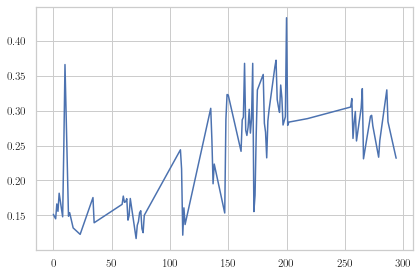

In [17]:
import matplotlib.pyplot as plt
ts = pd.Series(df1.iloc[:,1])

ts.plot();

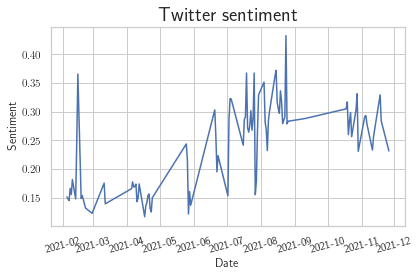

In [28]:
ax = sns.lineplot(x="date", y="mean", data=clean_df)
plt.xticks(rotation=15)
plt.title('Twitter sentiment')
ax.set(xlabel='Date', ylabel='Sentiment')
plt.savefig('images/sentiment_transparent.png', dpi=400, transparent=True)
plt.show()
plt.close()

In [13]:
import seaborn as sns

sns.set(font_scale=1, rc={'text.usetex': True})
sns.set_style("whitegrid")

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rcParams['axes.titlesize'] = 20

In [14]:
df1

,date,mean,std,var
0,2021-02-05,0.151515,0.375420,0.140940
1,2021-02-06,0.148199,0.356104,0.126810
2,2021-02-07,0.145060,0.340988,0.116273
3,2021-02-08,0.166337,0.355058,0.126066
4,2021-02-09,0.155760,0.362583,0.131466
...,...,...,...,...
290,2021-11-22,0.261612,0.452084,0.204635
291,2021-11-23,0.254145,0.447475,0.200488
292,2021-11-24,0.246678,0.442865,0.196342
293,2021-11-25,0.239210,0.438256,0.192196


In [3]:
fear = pd.read_csv("data/fear.alternative.me.csv")

In [5]:
fear.head()

,date,fng_value,fng_classification
0,11-28-2021,27,Fear
1,11-27-2021,21,Extreme Fear
2,11-26-2021,47,Neutral
3,11-25-2021,32,Fear
4,11-24-2021,42,Fear


In [6]:
fear["date"] = pd.to_datetime(fear["date"])
fear = fear.set_index("date")
fear

,fng_value,fng_classification
date,,
2021-11-28,27,Fear
2021-11-27,21,Extreme Fear
2021-11-26,47,Neutral
2021-11-25,32,Fear
2021-11-24,42,Fear
...,...,...
2018-02-05,11,Extreme Fear
2018-02-04,24,Extreme Fear
2018-02-03,40,Fear


In [7]:
fear.iloc[200:,0]

date
2021-05-12    68
2021-05-11    61
2021-05-10    72
2021-05-09    73
2021-05-08    67
              ..
2018-02-05    11
2018-02-04    24
2018-02-03    40
2018-02-02    15
2018-02-01    30
Name: fng_value, Length: 1194, dtype: int64

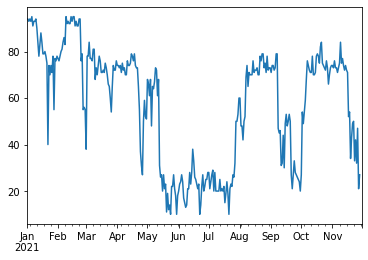

In [13]:
fear_ts = pd.Series(fear.iloc[:,0], index=pd.date_range("1/1/2021", "30/11/2021"))

fear_ts.plot();